## Task 2

This task focused on training the pre-processed dataset under an MLP classifier without feature selection and evaluate its performance. At a glance, it can be seen that accuracy significantly improves. This gave an indication that the improvement was due to either (i) the MLP classifier or (ii) using all features. This will be evaluated below.

Write a Python program to build a MLP classifier and evaluate your model’s performance. For this task, you should use the pre-processed and transformed dataset without feature selection from Task 3.1.

<span style="font-weight:bold;">Save your response (program and markdown) as task2.ipynb</span>

## <b style="color: blue;">A visualization should have a goal/question/hypothesis. Clarify this!</b>

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from functions.pre_processing import *
from functions.transformations import *
from functions.feature_selection import *
from functions.analysis import *
from functions.model import *
from functions.classifiers import *
from functions.evaluation import *
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning

-----
## Fetching dataset from Task 1

The saved dataset from Task 1 before feature selection is fetched for training

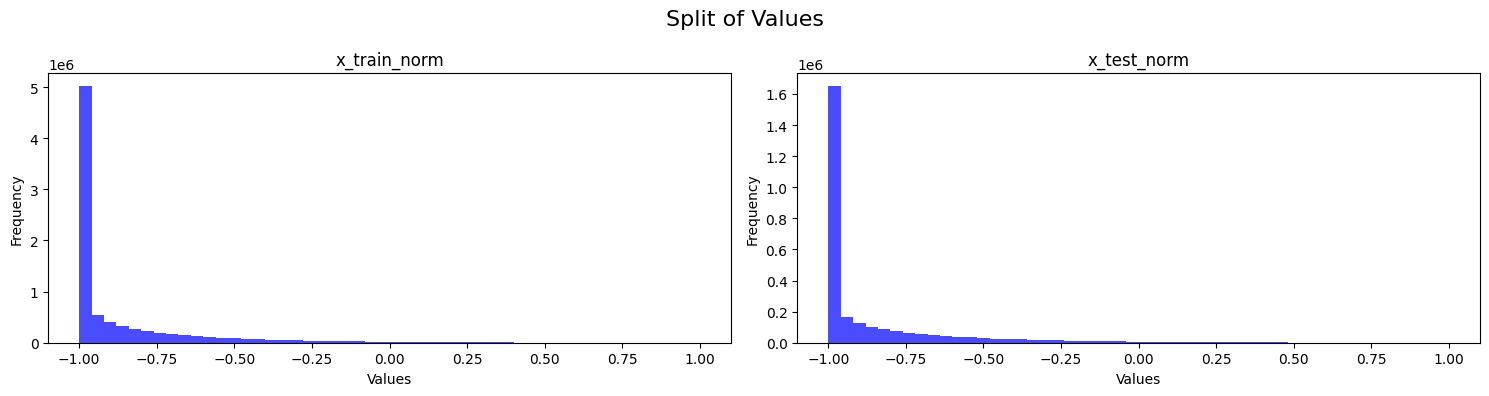

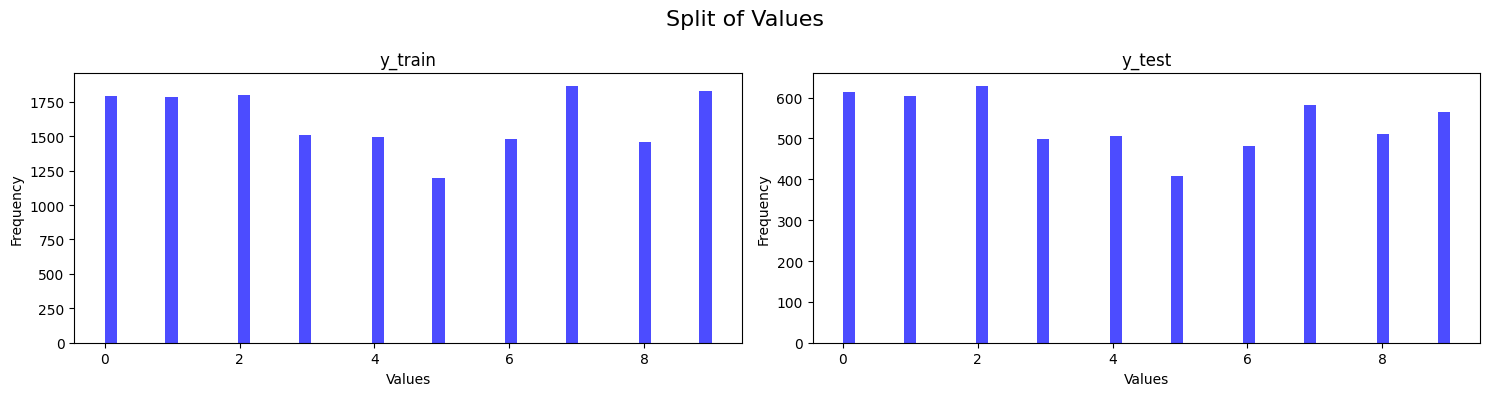

In [2]:
x_train_norm = load_model("datasets/task1/x_train")
x_test_norm = load_model("datasets/task1/x_test")
y_train = load_model("datasets/task1/y_train")
y_test = load_model("datasets/task1/y_test")

plot_class_split_of_values([x_train_norm, x_test_norm], ["x_train_norm", "x_test_norm"])
plot_class_split_of_values([y_train, y_test], ["y_train", "y_test"])

---
## MLP Classifier Training

The best accuracy received for training and testing before hyperparameter optimisation is `0.964` and `0.9309`. This base model served as the starting benchmark for evaluation.

In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
mlp_training_results = mlp_classifier(x_train_norm, x_test_norm, y_train, y_test)
save_model(mlp_training_results, "models/task2/mlp_results")

------ Holdout Validation ------
Training Accuracy: 0.9640123456790124
Testing Accuracy: 0.9248148148148149
------ Cross Validation ------
Mean Accuracy: 0.9309876543209876
------ K fold Validation ------
Mean Accuracy: 0.930432098765432
Std Deviation: 0.005856395069223758
------ Stratified K fold Validation ------
Mean Accuracy: 0.9279012345679012
Std Deviation: 0.004406560073475232
models/task2/mlp_results has the new model!


---
## Hyperparameter Optimisation

Best configuration - hidden_layers=(100,), activation=tanh, solver=adam, alpha=0.05

Mean - 0.932037037037037

In [ ]:
hidden_layers = [(50,50,50), (50,100,50), (100,)]
activations = ['tanh', 'relu']
solvers = ['sgd', 'adam']
alphas = [0.0001, 0.05]
outer_cv = KFold(n_splits=10, shuffle=True)

for layer in range(len(hidden_layers)):
     for activation in range(len(activations)):
          for solver in range(len(solvers)):
               for alpha in range(len(alphas)):
                    inner_scores = []
                    mlp_clf = MLPClassifier(hidden_layer_sizes=hidden_layers[layer], activation=activations[activation], solver=solvers[solver], alpha=alphas[alpha])

                    # Nested CV
                    for train_index, val_index in outer_cv.split(x_train_norm):
                         X_train, X_val = x_train_norm[train_index], x_train_norm[val_index]
                         Y_train, Y_val = y_train[train_index], y_train[val_index]
                         mlp_clf.fit(X_train, Y_train)
                         training_score = mlp_clf.score(X_train, Y_train)
                         test_score = mlp_clf.score(X_val, Y_val)
                         inner_scores.append(test_score)
                    
                    mean_score = sum(inner_scores) / len(inner_scores)

                    print(f"------- With hidden_layers={hidden_layers[layer]}, activation={activations[activation]}, solver={solvers[solver]}, alpha={alphas[alpha]}")
                    holdout_validation(mlp_clf, x_train_norm, x_test_norm, y_train, y_test)
                    print(f"Mean - {mean_score}")

------- With hidden_layers=(50, 50, 50), activation=tanh, solver=sgd, alpha=0.0001
------ Holdout Validation ------
Training Accuracy: 0.9637654320987654
Testing Accuracy: 0.9288888888888889
Mean - 0.9297530864197532
------- With hidden_layers=(50, 50, 50), activation=tanh, solver=sgd, alpha=0.05
------ Holdout Validation ------
Training Accuracy: 0.9629012345679012
Testing Accuracy: 0.9253703703703704
Mean - 0.928641975308642
------- With hidden_layers=(50, 50, 50), activation=tanh, solver=adam, alpha=0.0001
------ Holdout Validation ------
Training Accuracy: 0.981358024691358
Testing Accuracy: 0.9251851851851852
Mean - 0.9263580246913581
------- With hidden_layers=(50, 50, 50), activation=tanh, solver=adam, alpha=0.05
------ Holdout Validation ------
Training Accuracy: 0.9669135802469135
Testing Accuracy: 0.9151851851851852
Mean - 0.9264197530864198


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


-----------------------------------------------------------------
## Evaluation

Validate whether it was (i) MLP Classifier or (ii) Use of all features or both.

are all features needed?

Show how each compares to a model with greater feature selection

Describe all metrics used

#### Classification Report - <span style="color:red; font-weight:bold;">Fix class 3.0 and 6.0</span> [Hypothesis rn is that it is because of class imbalance]
Why needed xyz 

In [4]:
fetch_classification_report(mlp_training_results, x_test_norm, y_test)

----- Classification Report -----
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       613
         1.0       0.98      0.96      0.97       605
         2.0       0.90      0.93      0.92       628
         3.0       0.83      0.86      0.84       499
         4.0       0.94      0.94      0.94       507
         5.0       0.91      0.93      0.92       409
         6.0       0.88      0.83      0.85       481
         7.0       0.95      0.97      0.96       583
         8.0       0.93      0.88      0.90       511
         9.0       0.98      0.98      0.98       564

    accuracy                           0.92      5400
   macro avg       0.92      0.92      0.92      5400
weighted avg       0.93      0.92      0.92      5400



<span style="color:red; font-weight:bold;">Class 3 and 6 have bad recall values -> Meaning not identifying all the true positives</span> -> I would have tried undersampling if the library was allowed to use as I hypothesize that getting the training data split to an equivalent amount would ensure balanced distribution of features and classes, and avoid overfitting due to classes with more data
Update - Both undersampling and oversampling dont work

I would try ensemble methods like bagging to combine <span style="color:red; font-weight:bold;">multiple models</span> and fetch the accurate results

<span style="font-weight: bold; color:aqua">MANUAL UNDERSAMPLING AND OVERSAMPLING - Results were mediocre, improved 3 and 6, but worsened the other classes</span>

In [5]:
# Trained undersampling because it had better performance in the classification report -> Not taken over original dataset because does not improve accuracy
x_balanced, y_balanced = dataset_undersampling(x_train_norm, y_train)
mlp_undersampling = mlp_classifier(x_balanced, x_test_norm, y_balanced, y_test)

------ Holdout Validation ------
Training Accuracy: 0.3788284518828452
Testing Accuracy: 0.4024074074074074
------ Cross Validation ------
Mean Accuracy: 0.2619246861924686
------ K fold Validation ------
Mean Accuracy: 0.9194979079497907
Std Deviation: 0.006959204313403124
------ Stratified K fold Validation ------
Mean Accuracy: 0.9191631799163181
Std Deviation: 0.009014381931042837


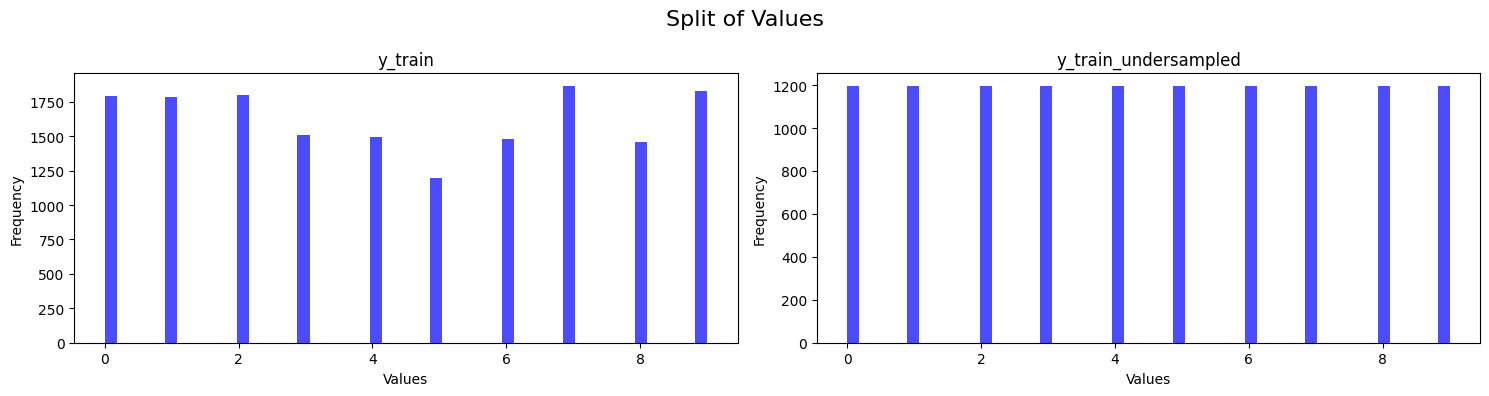

In [6]:
plot_class_split_of_values([y_train, y_balanced], ["y_train", "y_train_undersampled"])

In [7]:
dataset_oversampling(x_train_norm, y_train) # Oversampling only on the training set 
x_balanced_over, y_balanced_over = dataset_oversampling(x_train_norm, y_train)
mlp_oversampling = MLPClassifier(hidden_layer_sizes=(50, 100, 50), activation='tanh', solver='sgd', alpha=0.0001, random_state=42, shuffle=False) # Configuration derived from hyperparameter tuning
mlp_oversampling.fit(x_balanced_over, y_balanced_over)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 100, 50),
              random_state=42, shuffle=False, solver='sgd')

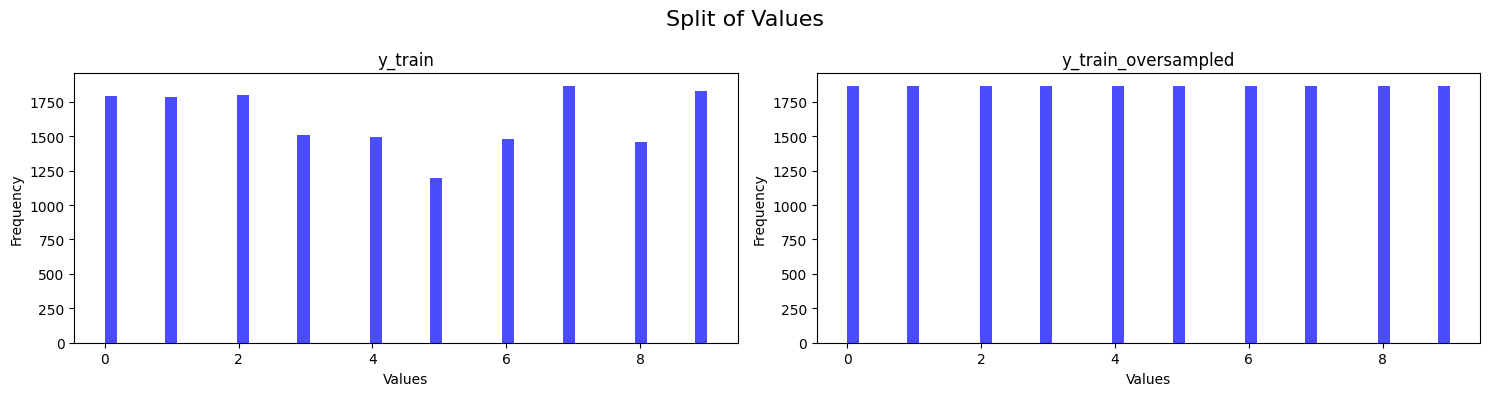

In [8]:
plot_class_split_of_values([y_train, y_balanced_over], ["y_train", "y_train_oversampled"])

#### Classification Report Comparison

In [10]:
# Classification Reports Grouped
fetch_multiple_classification_report([mlp_training_results, mlp_undersampling, mlp_oversampling], ["Original Dataset", "Undersampling", "Oversampling"], x_test_norm, y_test)

----- Original Dataset -----
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       613
         1.0       0.98      0.96      0.97       605
         2.0       0.90      0.93      0.92       628
         3.0       0.83      0.86      0.84       499
         4.0       0.94      0.94      0.94       507
         5.0       0.91      0.93      0.92       409
         6.0       0.88      0.83      0.85       481
         7.0       0.95      0.97      0.96       583
         8.0       0.93      0.88      0.90       511
         9.0       0.98      0.98      0.98       564

    accuracy                           0.92      5400
   macro avg       0.92      0.92      0.92      5400
weighted avg       0.93      0.92      0.92      5400

----- Undersampling -----
              precision    recall  f1-score   support

         0.0       0.89      0.50      0.64       613
         1.0       0.06      0.02      0.03       605
         2.0       0.00

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### Confusion Matrix
From the confusion matrix and split of metrics, it can be observed that the classes 3 (Permanent Crop) has very high FP meaning it is misclassyfing values as true when they are not, whereas class 6 (Herbaceous Vegetation) has high FN means it is classifying the right values as false

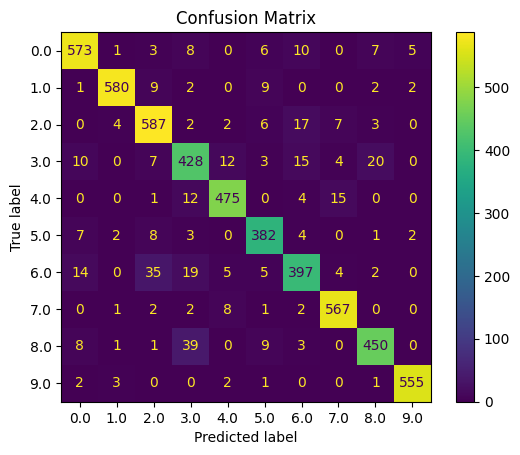

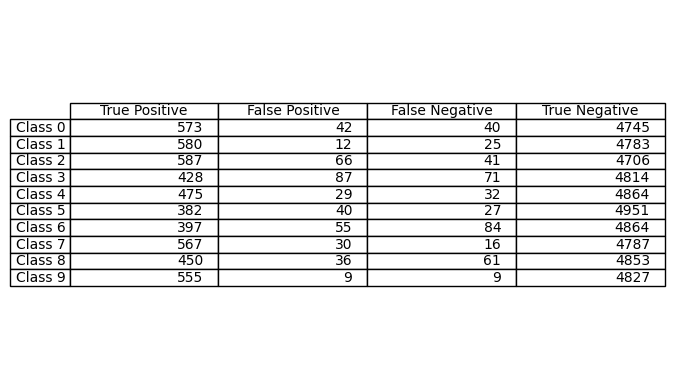

In [11]:
plot_confusion_matrix(mlp_training_results, x_test_norm, y_test)

#### Precision Recall, ROC, and DET Curve
Why needed xyz 

- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
- Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
- ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets. [WE HAVE IMBALANCED DATASET]

- Precision - number of true positives divided by the total number of positive predictions (Of all the instances predicted as positive, how many are actually positive?)
- Recall - fraction of positives that are correctly classified (Of all the actual positive instances, how many did the model predict as positive?)

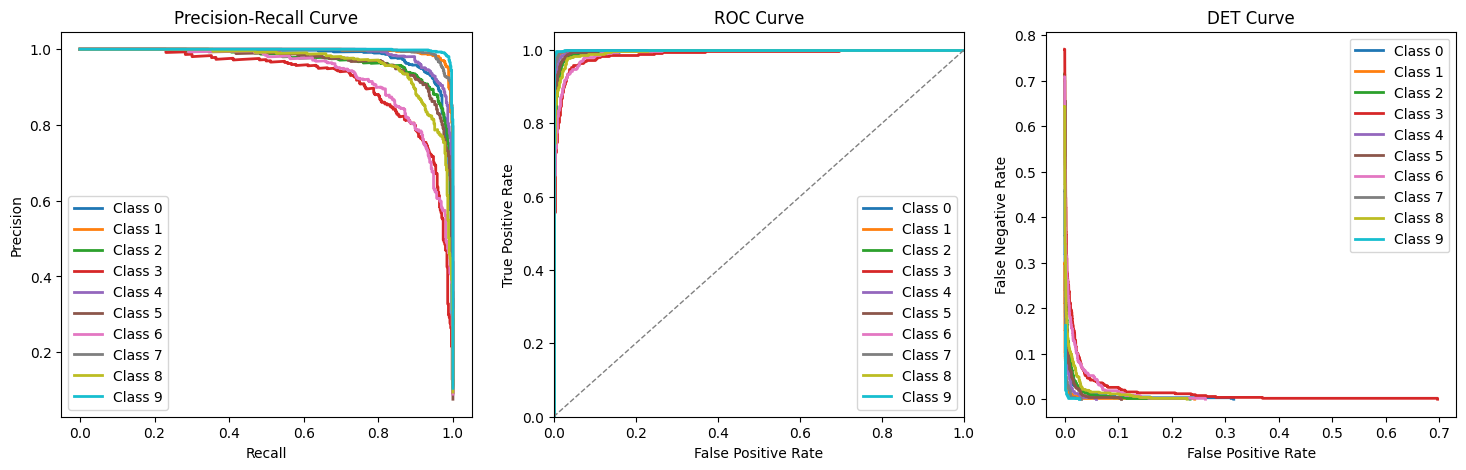

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
y_pred = mlp_training_results.predict_proba(x_test_norm)
plot_precision_recall_curve(y_test, y_pred, axes[0])
plot_roc_curve(y_test, y_pred, axes[1])
plot_det_curve(y_test, y_pred, axes[2])

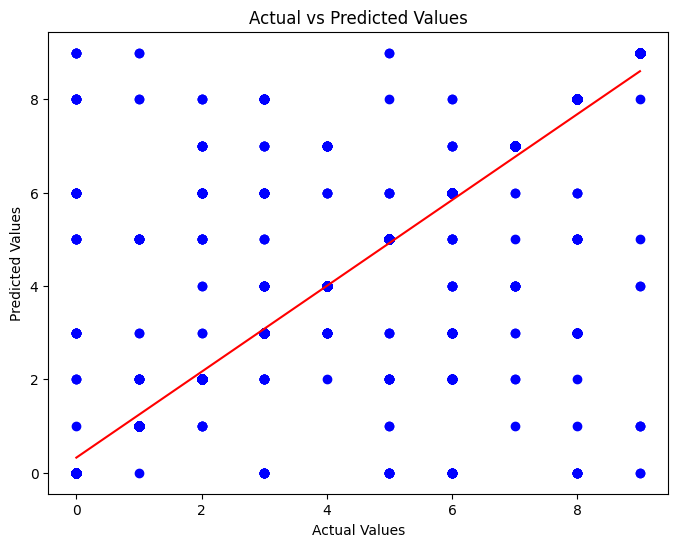

In [13]:
# WHAT DOES THIS MEAN?
y_pred = mlp_training_results.predict(x_test_norm)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
# plot_predicted_vs_actual(y_test, y_pred)

In [14]:
fetch_accuracy_score(y_test, y_pred)
y_pred_prob = mlp_training_results.predict_proba(x_test_norm)
fetch_log_loss(y_test, y_pred_prob)
# print(f"Loss: {classifier.loss_}")

Accuracy: 0.9248148148148149
Log Loss: 0.2217282976089409


In [15]:
cv_score = cross_val_score(mlp_training_results, x_train_norm, y_train, cv=10)
cv_mean_accuracy = np.mean(cv_score)
print("------ Cross Validation ------")
print(f"Mean Accuracy: {cv_mean_accuracy}")

------ Cross Validation ------
Mean Accuracy: 0.9309876543209876
